# GLayout Current Mirror Tutorial


<a href="https://colab.research.google.com/github/msaligane/US_Japan_Semiconductor_Workshop/blob/main/Day%202%20-%201300%20-%20GLayout/GLayout_Cmirror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
OpenFASOC Team, Feb 2024
SPDX-License-Identifier: Apache-2.0
```

## Introduction
Welcome!
This notebook serves as an introduction to the GDSFactory-based layout automation tool **GLayout** and an example producing a VIA to explain grules and glayers, as a part of [OpenFASoC](https://github.com/idea-fasoc/OpenFASOC).

Below we have the installation steps needed for the google collab envirment used in the tutorial, and for a local ubuntu installation (if you want to follow along locally).


## Installation On Google Collab
### 1. Clone the repository and install dependencies
**Python Dependencies**
* [`gdsfactory`](https://github.com/gdsfactory/gdsfactory): Provides the backend for GDS manipulation.
* [`sky130`](https://github.com/gdsfactory/skywater130): The Skywater 130nm PDK Python package for GDSFactory to use in this demo.
* [`gf180`](https://github.com/gdsfactory/gf180): The GF 180nm PDK Python package for GDSFactory to use in this demo.
* [`gdstk`](https://heitzmann.github.io/gdstk/): (installed as a part of gdsfactory) Used for converting GDS files into SVG images for viewing.
* [`svgutils`](https://svgutils.readthedocs.io/en/latest/): To scale the SVG image.

**System Dependencies**
* [`klayout`](https://klayout.de/): For DRC (Design Rule Checking).


#### 1.1. Installing the binary dependency `klayout` using micromamba
**You only need to run this once**

In [1]:
# Setup the environment for the OpenFASOC GDSFactory generator
# You only need to run this block once!

# Clone OpenFASoC
!git clone https://github.com/idea-fasoc/OpenFASOC
# Install python dependencies
!pip install sky130
!pip install gf180 prettyprinttree svgutils
!pip install gdsfactory==7.7.0

import pathlib
import os
# Install KLayout (via conda)
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}

!bin/micromamba create --yes --prefix $CONDA_PREFIX
# Install from the litex-hub channel
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        klayout

Cloning into 'OpenFASOC'...
remote: Enumerating objects: 13782, done.
remote: Counting objects: 100% (3236/3236), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 13782 (delta 2995), reused 3039 (delta 2919), pack-reused 10546
Receiving objects: 100% (13782/13782), 408.53 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (8404/8404), done.
Updating files: 100% (1717/1717), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.1/839.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.0/531.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 7.4 MB/s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.2/834.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.6/690.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: trimesh
    Found existing installation: trimesh 4.3.2
    Uninstalling trimesh-4.3.2:
      Successfully uninstalled trimesh-4.3.2
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.18.2
    Uninstalling pydantic_core-2.18.2:
      Successfully uninstalled pydantic_core-2.18.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    U

#### 1.2. Adding the `klayout` binary to the system path, then goto the GLayout directory
**You need to run this each time you restart the kernel**

In [2]:
# Setup the environment for the OpenFASOC GDSFactory generator

# Adding micro-mamba binary directory to the PATH
# This directory contains Klayout
import pathlib
import os
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
# Add conda packages to the PATH
PATH = os.environ['PATH']
%env PATH={PATH}:{CONDA_PREFIX}/bin

%cd /content/OpenFASOC/openfasoc/generators/gdsfactory-gen

env: CONDA_PREFIX=/content/conda-env
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/conda-env/bin
/content/OpenFASOC/openfasoc/generators/gdsfactory-gen


#### 1.3. Importing Libraries and Utility Functions

In [3]:
from glayout.pdk.sky130_mapped import sky130_mapped_pdk as sky130
from glayout.pdk.gf180_mapped  import gf180_mapped_pdk  as gf180
import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output
import ipywidgets as widgets

# Redirect all outputs here
hide = widgets.Output()

def display_gds(gds_file, scale = 3):
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg('out.svg')
  # Scale the image for displaying
  fig = sg.fromfile('out.svg')
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save('out.svg')

  # Display the image
  IPython.display.display(IPython.display.SVG('out.svg'))

def display_component(component, scale = 3):
  # Save to a GDS file
  with hide:
    component.write_gds("out.gds")
  display_gds('out.gds', scale)


2024-05-15 02:59:37.382 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: '/usr/local/lib/python3.10/dist-packages/gf180/layers.yaml'.
2024-05-15 02:59:37.491 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active


# Differential Pair Cell Design using GLayout API

This notebook demonstrates the process of designing differential pair cells using the GLayout API, which provides a versatile platform for creating complex integrated circuits layouts.

## Setup

First, import all the necessary modules from the `glayout` and `gdsfactory` packages.

In [18]:
# Code cell for imports
from glayout.pdk.mappedpdk import MappedPDK
from gdsfactory import Component
from glayout.pdk.util.comp_utils import move, movex, movey, prec_ref_center, evaluate_bbox
from glayout.primitives.fet import nmos, pmos
from glayout.primitives.guardring import tapring
from glayout.primitives.mimcap import mimcap, mimcap_array
from glayout.primitives.via_gen import via_stack, via_array
from glayout.placement.two_transistor_interdigitized import two_nfet_interdigitized
from glayout.components.diff_pair import diff_pair
from glayout.routing.L_route import L_route
from glayout.routing.c_route import c_route
from glayout.routing.straight_route import straight_route
from glayout.pdk.sky130_mapped import sky130_mapped_pdk
from glayout.pdk.gf180_mapped import gf180_mapped_pdk

## Differential Pair Generic NMOS Cell, No Matching

Create a generic NMOS differential pair cell. Place two NMOS transistors and connect their corresponding ports. This is done without any matching.

In [20]:
def DiffPair_ncell(pdk: MappedPDK, width: float=7, fingers: int=4):
	pdk.activate()
	DiffPair = Component(name="DiffPair")
	# placing m1 centered at the origin
	m1_ref = DiffPair << nmos(pdk,width=width, length= 1, fingers=fingers, with_substrate_tap=False, with_dnwell=False)
	m2_ref = DiffPair << nmos(pdk,width=width, length= 1, fingers=fingers, with_substrate_tap=False, with_dnwell=False)
	DiffPair.add_ports(m2_ref.get_ports_list(),prefix="m2_")
	# move m1 left m2
	m1_ref.movex(-pdk.util_max_metal_seperation()-2*m1_ref.xmax)
	DiffPair.add_ports(m1_ref.get_ports_list(),prefix="m1_")
	# complete routing
	DiffPair << c_route(pdk,DiffPair.ports["m1_multiplier_0_source_E"],DiffPair.ports["m2_multiplier_0_source_E"])
	DiffPair << straight_route(pdk,DiffPair.ports["m1_tie_br_top_met_W"],DiffPair.ports["m2_tie_bl_top_met_E"])
	return DiffPair

In [ ]:
# view cell in 2 pdks with the following code
display_component(DiffPair_ncell(sky130_mapped_pdk))
display_component(DiffPair_ncell(gf180_mapped_pdk))

## Differential Pair Generic PMOS Cell, No Matching

Aside from a replicating the original nfet code, `DiffPair_pcell` should instantiate PMOS devices and follow a similar workflow to `DiffPair_ncell`. For the purpose of the notebook, reproduce the `DiffPair_ncell` code with the appropriate PMOS instantiation or configuration. This shows how due to the parralel structure of the pfet and nfet devices, it is possible to directly interchange them with Glayout API.

In [21]:
def DiffPair_pcell(pdk: MappedPDK, width: float=7, fingers: int=4):
	pdk.activate()
	DiffPair = Component(name="DiffPair")
	# placing m1 centered at the origin
	m1_ref = DiffPair << pmos(pdk,width=width, length= 1, fingers=fingers)
	m2_ref = DiffPair << pmos(pdk,width=width, length= 1, fingers=fingers)
	DiffPair.add_ports(m2_ref.get_ports_list(),prefix="m2_")
	# move m1 left m2
	m1_ref.movex(-pdk.util_max_metal_seperation()-2*m1_ref.xmax)
	DiffPair.add_ports(m1_ref.get_ports_list(),prefix="m1_")
	# complete routing
	DiffPair << c_route(pdk,DiffPair.ports["m1_multiplier_0_source_E"],DiffPair.ports["m2_multiplier_0_source_E"])
	DiffPair << straight_route(pdk,DiffPair.ports["m1_tie_br_top_met_W"],DiffPair.ports["m2_tie_bl_top_met_E"])
	DiffPair << straight_route(pdk,DiffPair.ports["m1_tie_br_top_met_W"],DiffPair.ports["m2_tie_bl_top_met_E"])
	return DiffPair

In [ ]:
# view cell in 2 pdks with the following code
display_component(DiffPair_pcell(sky130_mapped_pdk))
display_component(DiffPair_pcell(gf180_mapped_pdk))



## Differential Pair with NMOS Cell, Interdigitized Placement

Define a function to create an NMOS differential pair, route the connections and add the component to the layout. This is done with interdigitized placement to provide closer matching between the two transistors.

In [19]:
# Code cell for DiffPairnfet_cell
def DiffPairnfet_cell(pdk: MappedPDK):
    pdk.activate()
    DiffPair = Component(name="DiffPair")
    dfpr = two_nfet_interdigitized(pdk, numcols=4, width=8, length=1, with_substrate_tap=False)
    dfpr_ref = prec_ref_center(dfpr)
    DiffPair.add(dfpr_ref)
    DiffPair.add_ports(dfpr_ref.get_ports_list(), prefix="dfpr_")
    DiffPair << c_route(pdk, DiffPair.ports["dfpr_A_source_E"], DiffPair.ports["dfpr_B_source_E"])
    DiffPair << c_route(pdk, DiffPair.ports["dfpr_A_source_W"], DiffPair.ports["dfpr_B_source_W"])
    return DiffPair

In [ ]:
# view cell in 2 pdks with the following code
display_component(DiffPairnfet_cell(sky130_mapped_pdk))
display_component(DiffPairnfet_cell(gf180_mapped_pdk))

## Defined Common Centroid Differential Pair NMOS and PMOS Cells

Utilize provided differential pair generators to create both NMOS and PMOS differential pair cells with specified lengths and widths. These place in a common centroid ab,ba pattern. The Glayout component library currently has additional pcells, and several of the same cell with different place strategies, such as: cross coupled inverters, common source, common gate, common drain amplifiers, current mirrors, etc.

You can see the Glayout library in the Components folder on github

In [22]:
# Code cell for defn_diffpair
def defn_diffpair(pdk: MappedPDK):
    return diff_pair(pdk, length=1, width=6)

# Code cell for defp_diffpair
def defp_diffpair(pdk: MappedPDK):
    return diff_pair(pdk, n_or_p_fet=False, length=1, width=6)

# view cell in 2 pdks with the following code
display_component(defn_diffpair(sky130_mapped_pdk))
display_component(defn_diffpair(gf180_mapped_pdk))


## Visualization

Instantiate the PDK object and visualize the layout of the designed differential pair cells.

2024-05-15 03:40:15.365 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active
2024-05-15 03:40:30.405 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
2024-05-15 03:40:52.263 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active
2024-05-15 03:41:12.550 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
2024-05-15 03:41:42.572 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active
2024-05-15 03:42:07.076 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
2024-05-15 03:42:24.243 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active
2024-05-15 03:42:40.847 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
2024-05-15 03:42:59.990 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active


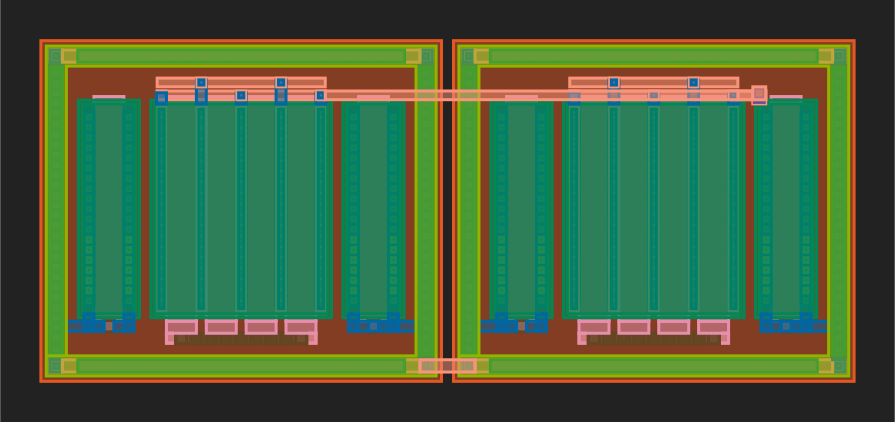

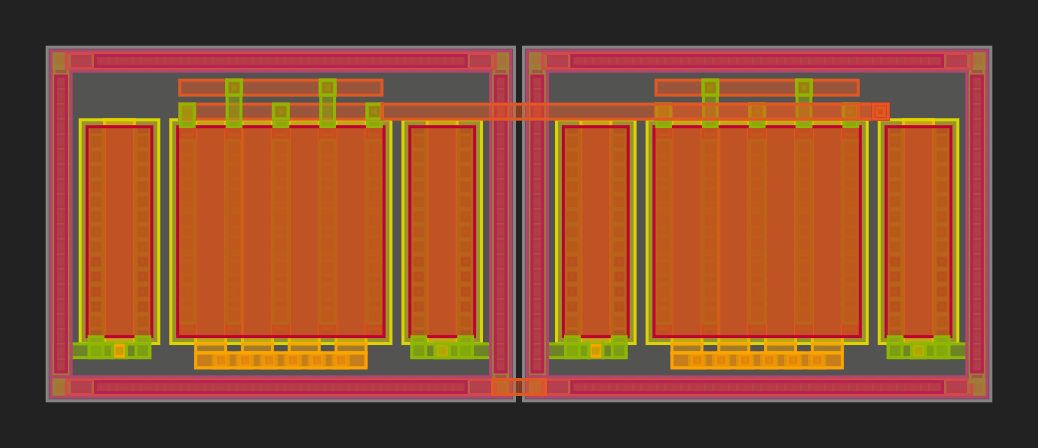

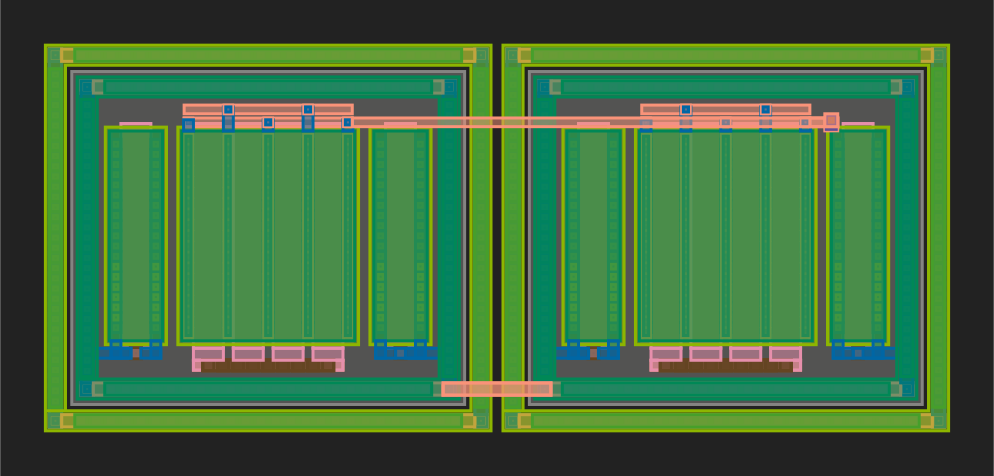

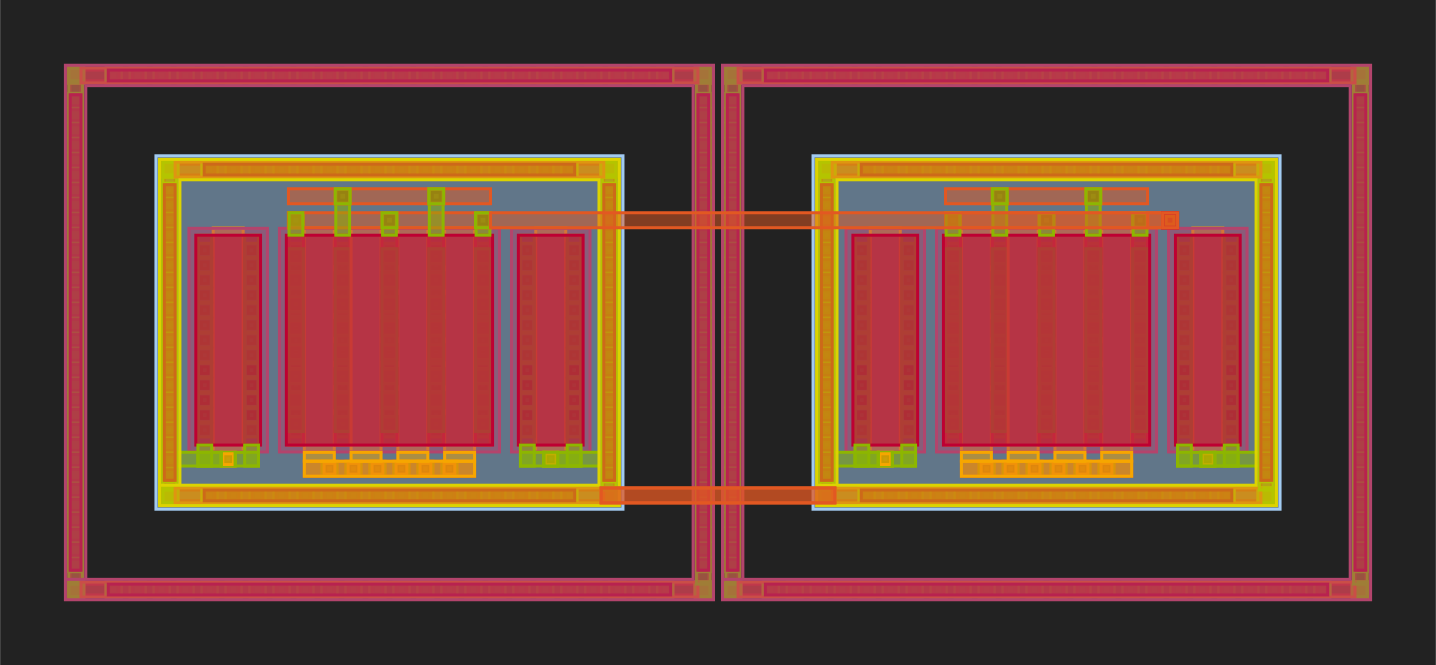

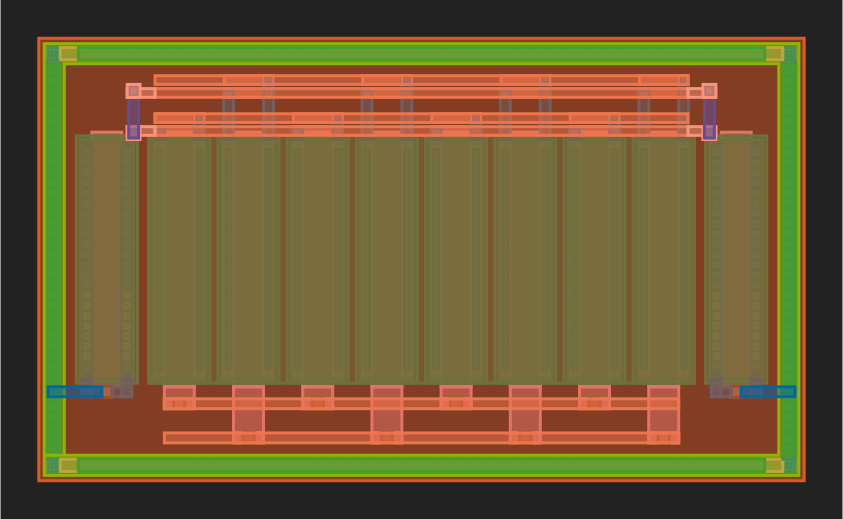

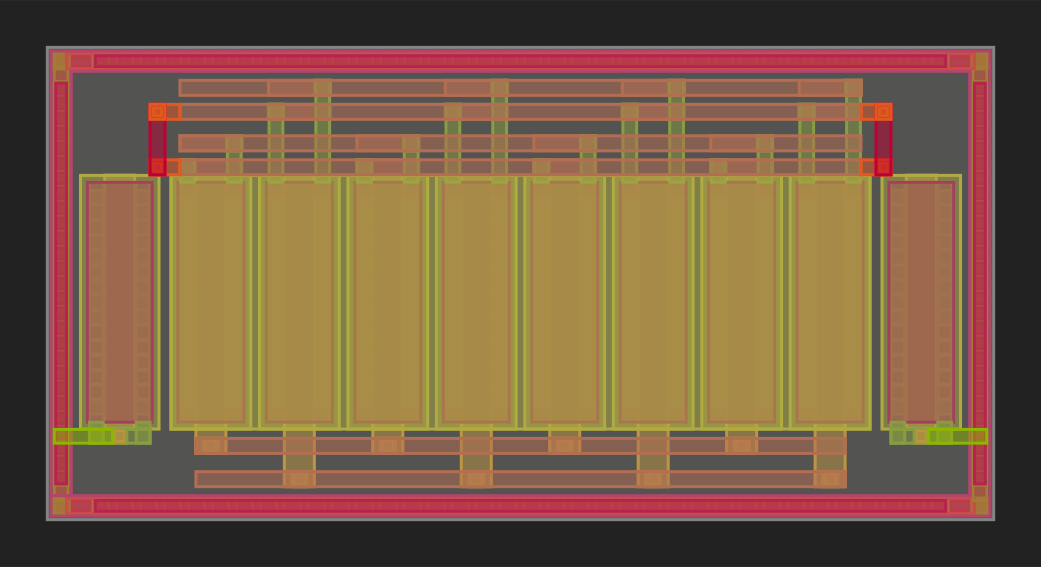

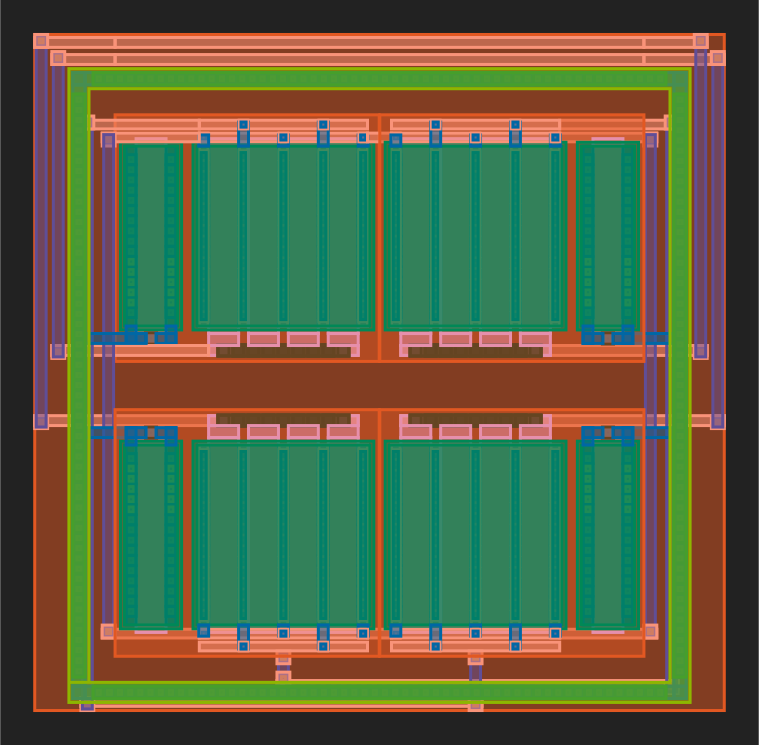

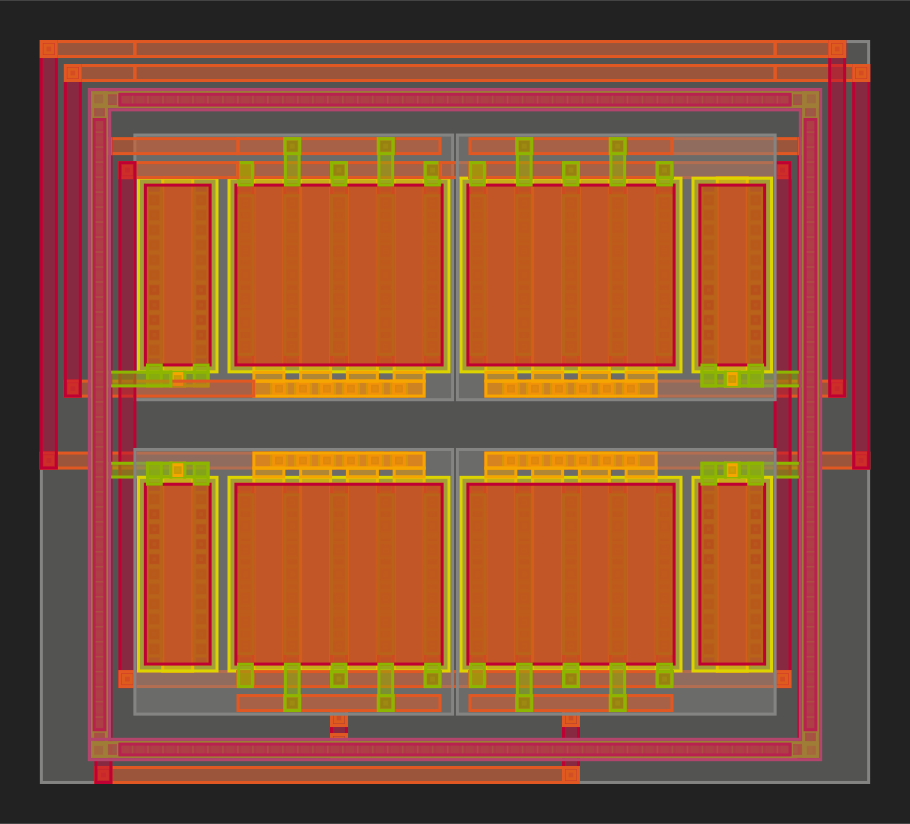

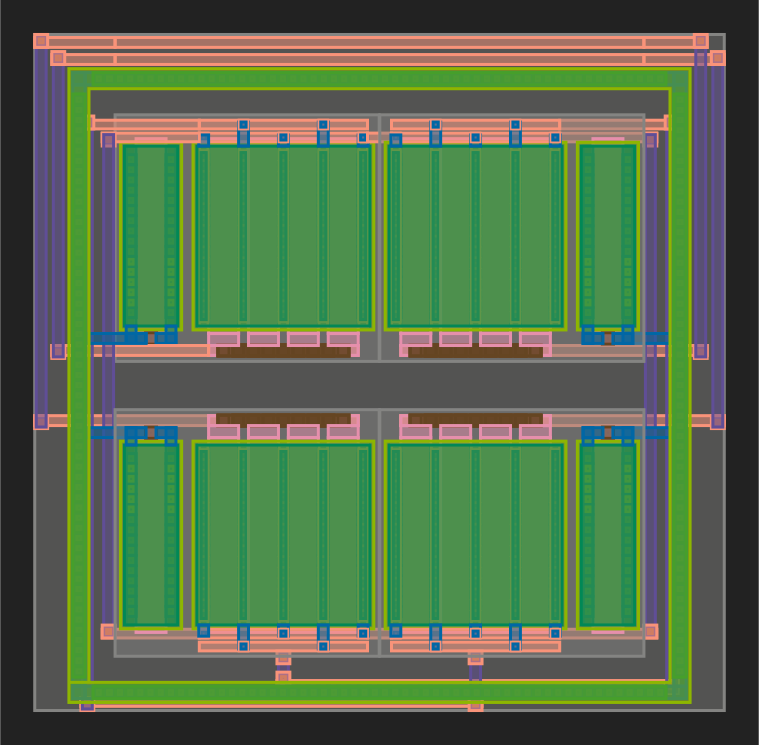

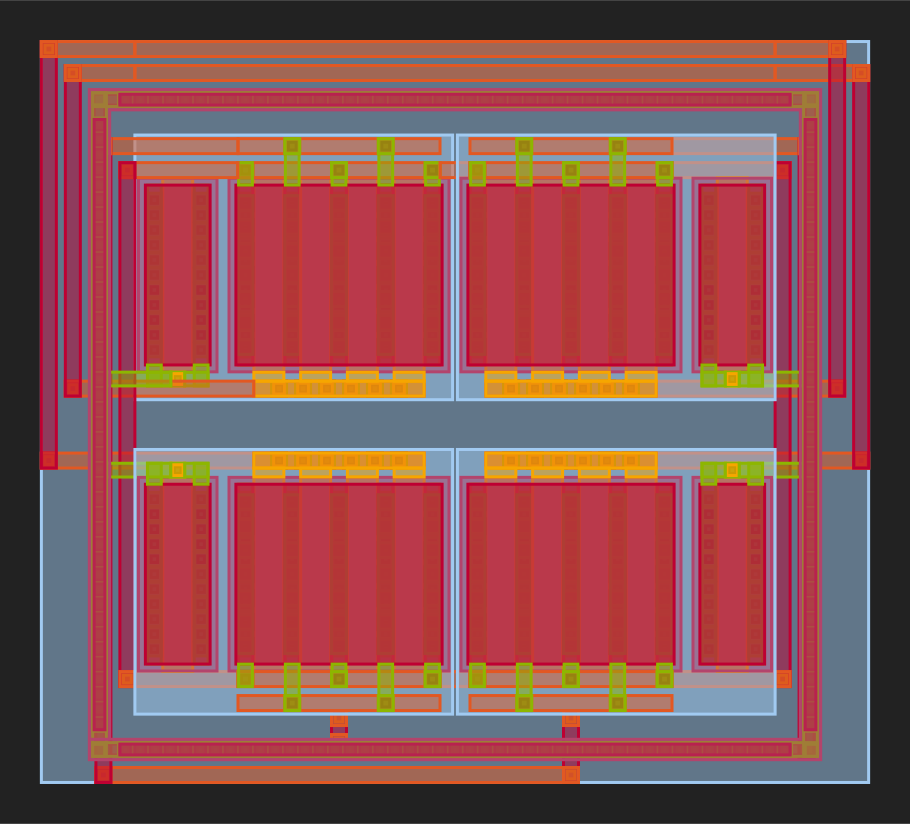

In [25]:
# Code cell for visualization of all previous cells
from glayout.pdk.sky130_mapped import sky130_mapped_pdk
from glayout.pdk.gf180_mapped import gf180_mapped_pdk

cells = list()
for diff_cell_function in [DiffPair_ncell, DiffPair_pcell, DiffPairnfet_cell, defn_diffpair, defp_diffpair]:
  cells.append(diff_cell_function(sky130_mapped_pdk))
  cells.append(diff_cell_function(gf180_mapped_pdk))

for cell in cells:
  display_component(cell)

## Conclusion and Overview

Designing matched circuits, for example with this differential pair, is pivotal in analog and mixed-signal circuit design ability to minimize process variation issues. Accurate matching and symmetry are crucial for differential pairs as mismatches can lead to common-mode noise conversion into differential-mode signals, adversely affecting the performance.

The 'glayout' API significantly facilitates the complex and often tedious process of IC design by offering high-level abstractions and automation of routine tasks. With 'glayout,' designers can place and interconnect transistors, capacitors, and other components programmatically, ensuring precision and adherence to design rules intrinsic to the specified PDK.